# Εφαρμογή 3

In [1]:
import sympy as sym
from sympy import Matrix
from mitroiki_functs import round_expr

from IPython.display import Image

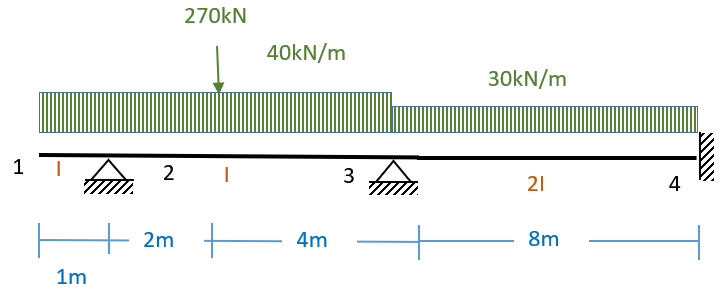

In [2]:
Image('https://raw.githubusercontent.com/panagop/ihu_courses/main/shared/images/mitroa/example3/ekfonisi.png', width=700)

## Python functions

### Συναρτήσεις μητρώων στιβαρότητας

In [3]:
def K_with_axial(A: float, E: float, I: float, L: float) -> Matrix:
    """Return the stiffness matrix for an element with axial force.

    Args:
        A: Cross-sectional area of the element.
        E: Young's modulus of the element.
        I: Moment of inertia of the element.
        L: Length of the element.

    Returns:
        The stiffness matrix for the element.
    """
    k = Matrix([[A*E/L, 0, 0, -A*E/L, 0, 0],
                [0, 12*E*I/L**3, 6*E*I/L**2, 0, -12*E*I/L**3, 6*E*I/L**2],
                [0, 6*E*I/L**2, 4*E*I/L, 0, -6*E*I/L**2, 2*E*I/L],
                [-A*E/L, 0, 0, A*E/L, 0, 0],
                [0, -12*E*I/L**3, -6*E*I/L**2, 0, 12*E*I/L**3, -6*E*I/L**2],
                [0, 6*E*I/L**2, 2*E*I/L, 0, -6*E*I/L**2, 4*E*I/L]])
    return k


def K_without_axial(E: float, I: float, L: float) -> Matrix:
    """Return the stiffness matrix for an element with axial force.

    Args:
        E: Young's modulus of the element.
        I: Moment of inertia of the element.
        L: Length of the element.

    Returns:
        The stiffness matrix for the element.
    """
    k = Matrix([[12*E*I/L**3, 6*E*I/L**2, -12*E*I/L**3, 6*E*I/L**2],
        [6*E*I/L**2, 4*E*I/L, -6*E*I/L**2, 2*E*I/L],
        [-12*E*I/L**3, -6*E*I/L**2, 12*E*I/L**3, -6*E*I/L**2],
        [6*E*I/L**2, 2*E*I/L, -6*E*I/L**2, 4*E*I/L]])
    return k


### Συναρτήσεις μητρώων εξωτερικής φόρτισης

In [4]:
def P_uniformly_distributed_load(q: float, L: float) -> Matrix:
    """Return the force vector for a uniformly distributed load.

    Args:
        q: Load per unit length.
        L: Length of the element.

    Returns:
        The force vector for the element.
    """
    p = Matrix([[-q*L/2],
                [-q*L**2/12],
                [-q*L/2],
                [q*L**2/12]])
    return p

def P_point_load_at_distance_a(P: float, L: float, a: float) -> Matrix:
    """Return the force vector for a point load at distance a.

    Args:
        P: Point load.
        L: Length of the element.
        a: Distance from the start of the element.

    Returns:
        The force vector for the element.
    """
    b = L - a
    p = Matrix([[-P*b/L**3*(L**2 - a**2 + a*b)],
                [-P*a*b**2/L**2],
                [-(P*a/L**3)*(L**2 - b**2 + a*b)],
                [P*a**2*b/L**2]])
    return p

## Επίλυση

### Αντιστοίχιση τοπικών - καθολικών βαθμών ελευθερίας

Ο πρόβολος αφαιρείται από τον φορέα, μεταφέροντας τα φορτία του στην αριστερή στήριξη.

Επομένως ο τελικός φορέας που θα επιλυθεί έχει δύο στοιχεία, ως εξής:

| Καθολ. Συστ. | (1) | (2) | (3) | (4) | (5) | (6) | 
|--------------|-----|-----|-----|-----|-----|-----|
| 1            |  1  |  2  |  3  | 4   |     |     |  
| 2            |     |     |  1  | 2   |  3  |  4  | 


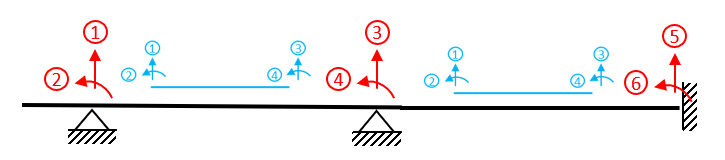

In [5]:
Image("https://raw.githubusercontent.com/panagop/ihu_courses/main/shared/images/mitroa/example3/dof_global_local.png", width=700)

### Μητρώα στιβαρότητας

#### Μητρώο στιβαρότητας στοιχείου 1

In [6]:
K1 = K_without_axial(E=1.0, I=1.0, L=6.0)
round_expr(K1, 6)

Matrix([
[ 0.055556,  0.166667, -0.055556,  0.166667],
[ 0.166667,  0.666667, -0.166667,  0.333333],
[-0.055556, -0.166667,  0.055556, -0.166667],
[ 0.166667,  0.333333, -0.166667,  0.666667]])

#### Μητρώο στιβαρότητας στοιχείου 2

In [7]:
K2 = K_without_axial(E=1.0, I=2.0, L=8.0)
round_expr(K2, 6)

Matrix([
[ 0.046875,  0.1875, -0.046875,  0.1875],
[   0.1875,     1.0,   -0.1875,     0.5],
[-0.046875, -0.1875,  0.046875, -0.1875],
[   0.1875,     0.5,   -0.1875,     1.0]])

### Μητρώα εξωτερικών φορτίσεων

#### Μητρώο εξωτερικών φορτίσεων στοιχείου 1

Το στοιχείο 1 έχει τα εξωτερικά φορτία που μεταφέρονται από τον πρόβολο και επιπλέον αυτά που αναππτύσσονται λόγω του ομοιόμορφου φορτίου q και του σημειακού φορτίου P.

In [8]:
P1_point = P_point_load_at_distance_a(P=270.0, L=6.0, a=2.0)
P1_point

Matrix([
[-200.0],
[-240.0],
[ -70.0],
[ 120.0]])

In [9]:
P1_provolos = Matrix([[-40 * 1.0],
                    [40 * 1.0**2 / 2], 
                    [0],
                    [0]])
P1_provolos

Matrix([
[-40.0],
[ 20.0],
[    0],
[    0]])

In [10]:
P1_uniform = P_uniformly_distributed_load(q=40.0, L=6.0)
P1_uniform

Matrix([
[-120.0],
[-120.0],
[-120.0],
[ 120.0]])

οπότε το συνολικό μητρώο εξωτερικών φορτίσεων για το στοιχείο 1 είναι το άθροισμα των 3 παραπάνω μητρώων:

In [11]:
P1 = P1_point + P1_provolos + P1_uniform
P1

Matrix([
[-360.0],
[-340.0],
[-190.0],
[ 240.0]])

Το στοιχείο 2 φέρει τα φορτία μόνο του ομοιόμορφου φορτίου q.

In [12]:
P2 = P2_uniform = P_uniformly_distributed_load(q=30.0, L=8.0)
P2

Matrix([
[-120.0],
[-160.0],
[-120.0],
[ 160.0]])

#### Συνολικό μητρώο στιβαρότητας (συνδυασμός στοιχείων 1 και 2)

Είναι διαστάσεων 6x6 και δημιουργείται από το συνδυασμό των επιμέρους μητρώων, βάσει της αντιστοίχισης των βαθμών ελευθερίας στο καθολικό σύστημα συντεταγμένων

Δημιουργείται ένα μηδενικό μητρώο 6x6 και σταδιακά προστίθενται οι τιμές στις κατάλληλες θέσεις


In [13]:
# Δημιουργώ αρχικά ένα μηδενικό μητρώο 6x6 με όλα τα στοιχεία του μηδενικά
K = sym.zeros(6, 6)
# Στη συνέχεια προσθέτω τις τιμές του K1 στις αντίστοιχες θέσεις του K 
# (από 0 έως 3 στην python δηλαδή 1 έως 4 με αρίθμηση ξεκινώντας από το 1)
K[:4, :4] += K1
# και ομοίως για το K2 στις θέσεις 2 έως 5 στην python (3 έως 6 με αρίθμηση από το 1)
K[2:, 2:] += K2
# Οπότε τελικά προκύπτει το συνολικό K
round_expr(K, 6)

Matrix([
[ 0.055556,  0.166667, -0.055556, 0.166667,         0,       0],
[ 0.166667,  0.666667, -0.166667, 0.333333,         0,       0],
[-0.055556, -0.166667,  0.102431, 0.020833, -0.046875,  0.1875],
[ 0.166667,  0.333333,  0.020833, 1.666667,   -0.1875,     0.5],
[        0,         0, -0.046875,  -0.1875,  0.046875, -0.1875],
[        0,         0,    0.1875,      0.5,   -0.1875,     1.0]])

Παρατηρείται ότι το μητρώο στιβαρότητας δεν μπορεί να αντιστραφεί καθώς η ορίζουσά του είναι μηδενική.

In [14]:
# Υπολογισμός ορίζουσας του μητρώου στιβαρότητας
K.det()

0

#### Συνολικό μητρώο φορτίσεων
Το τελικό μητρώο φορτίσεων είναι διαστάσεων 6x1 και προκύπτει από την επαλληλία μητρώων των 2 παραπάνω στοιχείων:

In [15]:
# Δημιουργώ αρχικά ένα μηδενικό μητρώο 6x6 με όλα τα στοιχεία του μηδενικά
P = sym.zeros(6, 1)
# Στη συνέχεια προσθέτω τις τιμές του K1 στις αντίστοιχες θέσεις του K 
# (από 0 έως 3 στην python δηλαδή 1 έως 4 με αρίθμηση ξεκινώντας από το 1)
P[:4, 0] += P1
# και ομοίως για το K2 στις θέσεις 2 έως 5 στην python (3 έως 6 με αρίθμηση από το 1)
P[2:, 0] += P2
# Οπότε τελικά προκύπτει το συνολικό K
P

Matrix([
[-360.0],
[-340.0],
[-310.0],
[  80.0],
[-120.0],
[ 160.0]])

### Μητρώο παραμορφώσεων

Το μητρώο παραμορφώσεων U θα είναι διαστάσεων 6x1 (2 παραμορφώσεις: κατακόρυφη μετακίνηση και στροφή σε κάθε κόμβο).
Από τις συνθήκες στήριξης αναγνωρίζεται ότι οι μη μηδενικές τιμές θα είναι αυτές των U2 και U4.

In [16]:
U2, U4 = sym.symbols('U2 U4')
U = Matrix([[0], [U2], [0], [U4], [0], [0]])
U

Matrix([
[ 0],
[U2],
[ 0],
[U4],
[ 0],
[ 0]])

### Μητρώο αντιδράσεων

Το μητρώο αντιδράσεων R θα είναι διαστάσεων 6x1 (2 αντιδράσεις: κατακόρυφη δύναμη και ροπή σε κάθε κόμβο).
Από τις συνθήκες στήριξης αναγνωρίζεται ότι οι R2 και R4 θα έχουν μηδενικές τιμές.

In [17]:
R1, R3, R5, R6 = sym.symbols('R1 R3 R5 R6')
R = Matrix([[R1], [0], [R3], [0], [R5], [R6]])
R

Matrix([
[R1],
[ 0],
[R3],
[ 0],
[R5],
[R6]])

### Δεσμευμένοι και ελεύθεροι βαθμοί ελευθερίας

Οι δεσμευμένοι βαθμοί ελευθερίας στο καθολικό σύστημα είναι οι <span style="color:red">(1)</span>, <span style="color:red">(3)</span>, <span style="color:red">(5)</span> και <span style="color:red">(6)</span> λόγω των συνθηκών στήριξης.

Αντίθετα, ελεύθεροι είναι οι βαθμοί ελευθερίας <span style="color:blue">(2)</span> και <span style="color:blue">(4)</span>

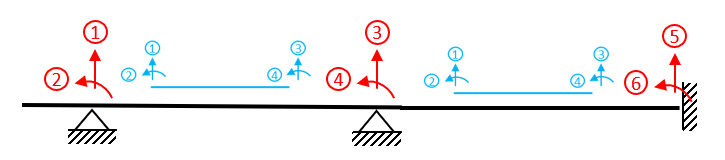

In [18]:
Image("https://raw.githubusercontent.com/panagop/ihu_courses/main/shared/images/mitroa/example3/dof_global_local.png", width=700)

### Διαχωρισμός μητρώων

| Καθολ. Συστ. | <span style="color:red">(1)</span> | <span style="color:blue">(2)</span> | <span style="color:red">(3)</span> | <span style="color:blue">(4)</span> | <span style="color:red">(5)</span>|<span style="color:red">(6)</span>| 
|--------------|-----|-----|-----|-----|-----|-----|
| 1            |  1  |  2  |  3  | 4   |     |     |  
| 2            |     |     |  1  | 2   |  3  |  4  | 

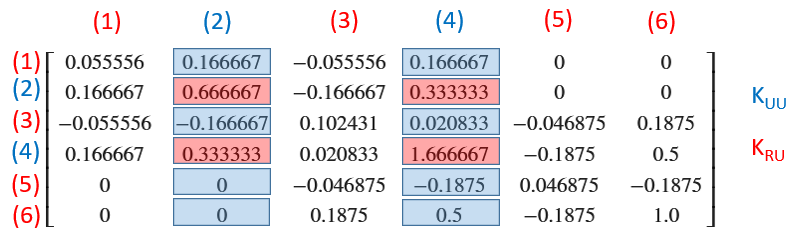

In [19]:
Image("https://raw.githubusercontent.com/panagop/ihu_courses/main/shared/images/mitroa/example3/Kuu_vs_Kru.png", width=700)

Ομοίως και για τα μητρώα εξωτερικής φόρτισης, παραμορφώσεων και αντιδράσεων

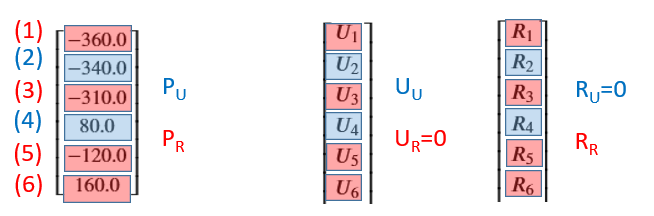

In [20]:
Image("https://raw.githubusercontent.com/panagop/ihu_courses/main/shared/images/mitroa/example3/PUR.png", width=550)

#### Υπομητρώα στιβαρότητας

In [21]:
K_UU = K[[1,3], [1,3]]
round_expr(K_UU, 6)

Matrix([
[0.666667, 0.333333],
[0.333333, 1.666667]])

Παρατηρείται ότι το μητρώο $K_{UU}$ έχει μη μηδενική ορίζουσα, οπότε είναι δυνατό να αντιστραφεί

In [22]:
K_UU.det()

1.00000000000000

In [23]:
K_RU = K[[0,2, 4, 5], [1,3]]
round_expr(K_RU, 6)

Matrix([
[ 0.166667, 0.166667],
[-0.166667, 0.020833],
[        0,  -0.1875],
[        0,      0.5]])

### Υπομητρώα εξωτερικής φόρτισης

In [24]:
P_U = P[[1,3], 0]
round_expr(P_U, 2)

Matrix([
[-340.0],
[  80.0]])

In [25]:
P_R = P[[0, 2, 4, 5], 0]
round_expr(P_R, 2)

Matrix([
[-360.0],
[-310.0],
[-120.0],
[ 160.0]])

### Υπολογισμός των παραμορφώσεων

Στόχος είναι η επίλυση της μητρωικής εξίσωσης:

Είναι $K_{UU}\cdot U_U = P_U + R_U$, με $R_U=0$

οπότε $K_{UU}\cdot U_U = P_U$

και τελικά $U_U = K_{UU}^{-1}\cdot P_U$


In [26]:
U_U = K_UU.inv() * P_U
round_expr(U_U, 2)

Matrix([
[-593.33],
[ 166.67]])

### Υπολογισμός αντιδράσεων στήριξης

Είναι $K_{RU}\cdot U_U = P_R + R_R$

οπότε $R_R = K_{RU}\cdot U_U - P_R$

In [27]:
R_R = K_RU*U_U - P_R
round_expr(R_R, 2)

Matrix([
[288.89],
[412.36],
[ 88.75],
[-76.67]])